In [ ]:
#All of the imports
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, clear_output
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [ ]:
board = np.zeros(shape = (250,200)) # Initializing a 250 by 200 size board of color purple

# heart
board[70:100,75:100] = 1 # left part of the heart (low oxygen; blue)
board[70:100,100:130] = 2 # right part of the heart (high oxygen; teal; anatomically bigger than the left part)

# lung 
board[5:40,70:135] = 3

# organ no.1 
board[140:160,80:120] = 4

# organ no.2
board[170:190,80:120] = 5

# organ no.3
board[200:220,80:120] = 6

# veins; blue
board[40:70,80:90] = 1 # vein connecting lung and left part of the heart
board[80:90,25:75] = 1 # top vein connecting lung with organs
board[90:215,25:35] = 1 # side vein connecting lung with organs
board[145:155,35:80] = 1 # side vein organ no.1
board[175:185,35:80] = 1 # side vein organ no.2
board[205:215,35:80] = 1 # side vein organ no.3

# arteries; teal
board[40:70,115:125] = 2 # artery connecting lung and right part of the heart
board[80:90,130:180] = 2 # top artery connecting lung with organs
board[90:215,170:180] = 2 # side artery connecting lung with organs
board[145:155,120:170] = 2 # side artery organ no.1
board[175:185,120:170] = 2 # side artery organ no.2
board[205:215,120:170] = 2 # side artery organ no.3

# plotting the board
plt.figure(figsize=(20,10))
plt.imshow(board) 

In [ ]:
class oxygen_carbon_dioxide():
    
    def __init__ (self, dims, color = 'aqua'):
        
        '''
        Intializing the oxygen/carbon_dioxide object and it's coordinates on the board, as well as it's initial color.
        If the object is aqua, then it represents oxygen. If the object is orange, then it represents carbon dioxide. 
        '''
        
        self.coords = dims
        self.dims = random.sample(dims, 1)
        self.x = dims[0][0] #x coordinate
        self.y = dims[0][1] #y coordinate
        
        self.color = color #object's color 
            
    def draw(self):
        
        '''
        Draws the object on the board 
        '''
        
        plt.scatter(self.x, self.y, c=self.color) #plots object's coordinates on board 
        
    def movement_up(self):
        
        '''
        The movement_up method moves the object up two units on the board. 
        
        Oxygen molecules diffuse from the lungs and move freely towards organs through the arteries (blue path).
        Carbon dioxide molecules diffuse from the organs and move freely towards the lungs through the veins (purple path).
        '''
        
        o_dy = 2 #change in y is 2 units
        
        o_x = self.x 
        o_y = self.y - o_dy #the board is rotated 180 degrees
                            #2 must be subtracted from the y-coordinate to move up two units 
        
        self.x = o_x #object's coordinates update after it moves 
        self.y = o_y #object's coordinates update after it moves  

    def movement_down(self):
        
        '''
        The movement_down method moves the object down two units on the board. 
        
        Oxygen molecules diffuse from the lungs and move freely towards organs through the arteries (blue path).
        Carbon dioxide molecules diffuse from the organs and move freely towards the lungs through the veins (purple path).
        '''
        
        o_dy = 2 #change in y is 2 units
        
        o_x = self.x 
        o_y = self.y + o_dy #the board is rotated 180 degrees
                            #2 must be added to the y-coordinate to move down two units 
        
        self.x = o_x #object's coordinates update after it moves 
        self.y = o_y #object's coordinates update after it moves  

    def movement_right(self):
        
        '''
        The movement_right method moves the object right two units on the board. 
        
        Oxygen molecules diffuse from the lungs and move freely towards organs through the arteries (blue path).
        Carbon dioxide molecules diffuse from the organs and move freely towards the lungs through the veins (purple path).
        '''
        
        o_dx = 2 #change in x is 2 units
        
        o_x = self.x + o_dx #2 is added to the x-coordinate to move to the right two units
        o_y = self.y 
        
        self.x = o_x #object's coordinates update after it moves  
        self.y = o_y #object's coordinates update after it moves       
        
    def movement_left(self):
        
        '''
        The movement_left method moves the object left two units on the board. 
        
        Oxygen molecules diffuse from the lungs and move freely towards organs through the arteries (blue path).
        Carbon dioxide molecules diffuse from the organs and move freely towards the lungs through the veins (purple path).
        '''
        
        o_dx = 2 #change in x is 2 units
        
        o_x = self.x - o_dx #2 is subtracted from the x-coordinate to move to the left two units
        o_y = self.y 
        
        self.x = o_x #object's coordinates update after it moves  
        self.y = o_y #object's coordinates update after it moves   
        
    def transfer(self):
        
        '''
        The transfer method changes the color of the object, depending on its location. 

        Oxygen molecules (aqua) diffuse from the lungs and move freely towards organs through the arteries (blue path).
        Carbon dioxide molecules (orange) diffuse from organs and move freely towards the lungs through veins (purple path).
        '''
        
        if 70 < self.x < 135 and 5 < self.y < 40: #If object is within the arteries it will represent an oxygen molecule
            color = 'aqua' #oxygen molecules are represented by blue objects 
            self.color = color 
            
        elif 80 < self.x < 120 and ((140 < self.y < 160) or (170 < self.y < 190 ) or (200 < self.y < 220)): 
            #If object is within the veins it will represent a carbon dioxide molecule
            color = 'orange' #carbon dioxide molecules are represented by orange objects 
            self.color = color
            
    def board_location(self):
        
        '''
        Returns the object's current x and y coordinates on the board
        '''
        
        return self.x, self.y 
    
def o2_co2_cell_simulation(cells):
    
    '''
    O2/CO2 Object Movement
    '''
#     _ = oxygen_carbon_dioxide(self.coords)

    fig, ax = plt.subplots(figsize=(10,5))
#     color = 'red'
    for _ in range(10000):
        
        for _ in cells:
    
            location = _.board_location()
    
            # change color when enter organs
            #if location[0] == 100 and location[1] == 150:
              #  color = 'orange'
            #if location[0] == 100 and location[1] == 180:
               # color = 'orange'
            #if location[0] == 100 and location[1] == 210:
                #color = 'orange'
    
            # change color when enter lung
            #if location[1] == 20:
             #   color = 'aqua'
                
            # movement conditions based on coordinates
            if location[1] < 86 and location[0] > 150:
                _.movement_down()
                _.transfer()
                _.draw()
        
            elif (30 <= location[0] < 86) and location[1] <= 86: 
                _.movement_right()
                _.transfer()
                _.draw()
        
            elif location[1] == 20 and location[0] == 86:
                _.movement_right()
                _.transfer()
                _.draw()
        
            elif 20 <= location[1] <=30 and location[0] >= 86 and location[0] != 120:
                _.movement_right()
                _.transfer()
                _.draw()
        
            elif location[1] <= 40 and location[0] == 120:
                _.movement_down()
                _.transfer()
                _.draw()
        
            elif location[0] == 86 and location[1] <= 86:
                _.movement_up()
                _.transfer()
                _.draw()
   
            elif location[0] == 30:
                _.movement_up()
                _.transfer()
                _.draw()

            elif location[0] < 176 and location[1] == 86:
                _.movement_right()
                _.transfer()
                _.draw()
                
            elif location[0] == 176 and location[1] < 150: 
                _.movement_down()
                _.transfer()
                _.draw()
            
            elif location[0] == 176 and location[1] == 150: #Potentially enter organ 1
                prob = random.random()
                if prob > 0.33:
                    _.movement_down()
                    _.transfer()
                    _.draw()
                else:
                    _.movement_left()
                    _.transfer()
                    _.draw()
                
            elif location[0] == 30 and location[1] == 150:
                _.movement_up()
                _.transfer()
                _.draw()
            
            elif location[1] == 150:
                _.movement_left()
                _.transfer()
                _.draw()  
        
            elif 40 < location[1] < 180: #Potentially enter organ 2 
                _.movement_down()
                _.transfer()
                _.draw()
        
            elif location[0] == 176 and location[1] == 180:
                prob = random.random()
                if prob > 0.33:
                    _.movement_down()
                    _.transfer()
                    _.draw()
                else:
                    _.movement_left()
                    _.transfer()
                    _.draw()
                    
            elif location[0] == 30 and location[1] == 180:
                _.movement_up()
                _.transfer()
                _.draw()

            elif location[1] == 180:
                _.movement_left()
                _.transfer()
                _.draw()  
    
            elif 40 < location[1] < 210: #Potentially enter organ 3 
                _.movement_down()
                _.transfer()
                _.draw()

            elif location[0] == 30 and location[1] == 210:
                _.movement_up()
                _.transfer()
                _.draw()

            elif location[1] == 210:
                _.movement_left()
                _.transfer()
                _.draw()  
    
    
        # Animaiton part (dosn't change)
        plt.imshow(board)
        image_path = 'The_heart.jfif'
        the_image = 'The_lungs.jpg'
        imscatter(102, 90, image_path, zoom=0.165) #plotting picture of the heart 
        imscatter(102, 22, the_image, zoom=0.275) #plotting picture of lungs 
        clear_output(wait=True) # Clear output for dynamic display
        display(fig)            # Reset display
        fig.clear()             # Prevent overlapping and layered plots
        time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up
        # Sleep for a fraction of a second to allow animation to catch up

KeyboardInterrupt: 

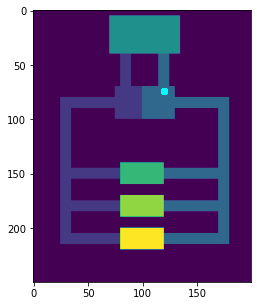

In [11]:
# Running the simulation of oxygen/carbon dioxide molecules
coords = [[100,26], [100,150], [100,180], [100,210]]
cellies = ['a', 'b', 'c', 'd']
cells = [oxygen_carbon_dioxide(coords) for x in range(10)]

o2_co2_cell_simulation(cells)

# for i in range(4):
#     cells[i].o2_co2_cell_simulation()
# #_ = oxygen_carbon_dioxide(dims=coords)
# #_.oxygen_carbon_simulation()